# Open Exploration: Uncertainty Analysis

### Feature Scoring and Dimensional Stacking

This notebook aims to provide **a better understanding of uncertainties and their potential impact on the outcomes** of the Ijssel River simulation model. We utilize Feature Scoring to quantify the degree of correlation between each uncertainty and outcomes. Additionally, we employ dimensional stacking to visualize how uncertainties' responses vary in the high-dimensional parameter space.

To conduct a comprehensive analysis of uncertainties, we have selected specific model outputs based on our role as analysts of Dike Ring 4. The following outcomes of interest have been identified. *For a more detailed explanation of the selected model outputs, please refer to the report [mention the name of the final PDF report].*

| Outcome Name | Outcome Name on the Code |
| --- | --- |
| Deaths in Dike Ring 4 | A4_Expected_Number_of_Deaths |
| Damages in Dike Ring 4 | A4_Expected_Annual_Damage |
| Total Deaths in all Dike Rings | Total_Expected_Number_of_Deaths |
| Total Annual Damage in all Dike Rings | Total_Expected_Annual_Damage |
| Total Infrastructure Costs in all Dike Rings | A4_Expected_Number_of_Deaths |

Additionally, for the sake of completeness, we have also included the following outcomes:

| Outcome Name | Outcome Name on the Code |
| --- | --- |
| Deaths in Dike Ring 1 | A1_Expected_Number_of_Deaths |
| Damages in Dike Ring 1 | A1_Expected_Annual_Damage |
| Deaths in Dike Ring 2 | A2_Expected_Number_of_Deaths |
| Damages in Dike Ring 2 | A2_Expected_Annual_Damage |
| Deaths in Dike Ring 3 | A3_Expected_Number_of_Deaths |
| Damages in Dike Ring 3 | A3_Expected_Annual_Damage |
| Deaths in Dike Ring 5 | A5_Expected_Number_of_Deaths |
| Damages in Dike Ring 5 | A5_Expected_Annual_Damage |

In [1]:
# Import all the necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from ema_workbench import load_results
from ema_workbench.analysis import feature_scoring, dimensional_stacking

from problem_formulation import get_model_for_problem_formulation

First, we upload the file with the **base case scenario** of 100,000 scenario runs. This is based on the problem_formulation called 'All Dikes'.

In [3]:
results = load_results('./output/base_case_results__100000_scenarios.tar.gz')

In [4]:
experiments, outcomes = results

Since it is the base case scenario, the policy levers will be equal to zero. Therefore we drop the columns of the policy levers.

In [6]:
model, steps = get_model_for_problem_formulation('All Dikes')
levers = [L.name for L in model.levers]
experiments = experiments.drop(columns=levers)

In [7]:
#Visualisation of the dataframe of the experiments
experiments

,A0_ID_flood_wave_shape,A1_Bmax,A1_Brate,A1_pfail,A2_Bmax,A2_Brate,A2_pfail,A3_Bmax,A3_Brate,A3_pfail,...,A4_pfail,A5_Bmax,A5_Brate,A5_pfail,discount_rate_0,discount_rate_1,discount_rate_2,scenario,policy,model
0,63,101.259903,1.5,0.408709,111.632141,1.5,0.135391,73.153987,1.0,0.451986,...,0.243025,196.349085,10.0,0.949137,1.5,1.5,3.5,0,Base Case,dikesnet
1,102,173.749092,1.5,0.486810,305.847356,1.5,0.017351,92.171306,10.0,0.835282,...,0.252749,94.508040,10.0,0.402921,3.5,1.5,2.5,1,Base Case,dikesnet
2,83,176.691823,1.5,0.513075,212.006615,10.0,0.278083,244.949470,1.5,0.743619,...,0.906655,199.268565,10.0,0.936326,3.5,3.5,4.5,2,Base Case,dikesnet
3,13,125.499790,1.5,0.764957,100.265877,10.0,0.128555,62.674734,10.0,0.179082,...,0.809163,72.704037,10.0,0.449961,4.5,3.5,2.5,3,Base Case,dikesnet
4,119,210.477969,1.0,0.226232,71.060402,10.0,0.494320,221.536830,1.0,0.962579,...,0.560819,210.763321,1.0,0.424762,2.5,1.5,4.5,4,Base Case,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,65,99.987320,1.5,0.702686,181.056779,10.0,0.063041,253.264381,1.0,0.707205,...,0.317891,307.981388,1.5,0.742173,4.5,4.5,4.5,99995,Base Case,dikesnet
99996,89,191.257748,10.0,0.703763,210.261350,10.0,0.403523,307.411291,1.5,0.244881,...,0.839907,90.672112,1.0,0.843987,3.5,3.5,2.5,99996,Base Case,dikesnet
99997,65,317.796709,1.5,0.869551,43.449560,1.0,0.109451,131.311438,10.0,0.478115,...,0.744944,84.268290,1.0,0.119752,2.5,1.5,1.5,99997,Base Case,dikesnet
99998,48,281.279374,1.5,0.815715,105.642186,10.0,0.438107,225.816089,1.0,0.018028,...,0.199128,198.488023,10.0,0.477807,2.5,3.5,1.5,99998,Base Case,dikesnet


----------------
## 1. Feature Scoring

After removing the unecessary columns from the dataset, Feature Scoring is performed. Feature Scoring shows the relevance between uncertainties (y-axis) and outcomes (x-axis) by creating a heatmap, where the greater values indicate a stronger correlation.

/home/fotini/anaconda3/lib/python3.10/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)


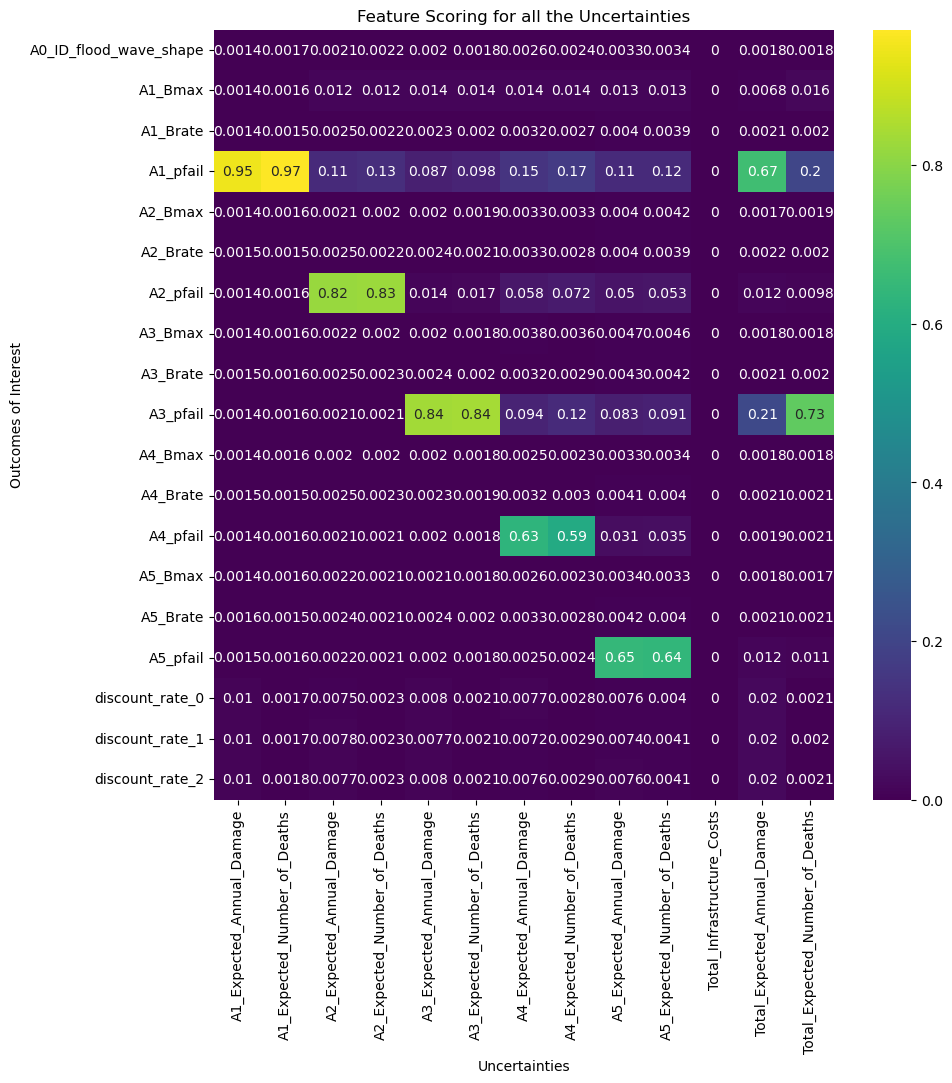

In [8]:
# All uncertainties
x = experiments
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(fs, cmap="viridis", annot=True, ax=ax)

#Graph setup
plt.title('Feature Scoring for all the Uncertainties')
plt.xlabel('Uncertainties')
plt.ylabel('Outcomes of Interest')
plt.savefig('./img/Feature_Scoring_Uncertainties.png')
plt.show()

------------------------------

## 2. Dimensional Stacking

<span style='color:red'>**WARNING**</span>: this might have broken with the upgrade to EMA Workbench 2.4.1. If it doesn't run, consult the provided figures in `img/`.

In the first step, Feature Scoring was employed to identify the most influential uncertainties, with the *probability that the dike will withstand the hydraulic load* (Ai_pfail) emerging as the most significant factor. However, in order to gain a more comprehensive understanding of how these uncertainties precisely impact  the outcomes of interest, Dimensional stacking was performed. The outcomes that were explored using Dimensional Stacking are the following:

* 2.1.1 Number of Deaths in Dike 4
* 2.1.2 Expected Annual Damage in Dike 4
* 2.2. Total Number of Deaths
* 2.3. Total Expected Annual Damage

For all the Dimensional Stacking runs, a threshold was set to limit the maximum value. Specifically, the threshold was set to retain approximately 68% of the total values, which corresponds to approximately one standard deviation.

In [10]:
# Use DataFrames for easier plotting
experiments= pd.DataFrame(experiments)
outcomes = pd.DataFrame(outcomes)

### 2.1.1  Number of Deaths in Dike Ring 4

In [11]:
# Determine the threshold value for keeping 68% of the total values
# Calculate the number of values greater than ..
greater_than_DR4_Deaths = len(outcomes[outcomes["A4_Expected_Number_of_Deaths"] < 0.0017])

# Calculate the percentage
percentage_DR4_Deaths = ((greater_than_DR4_Deaths
                          / len(outcomes["A4_Expected_Number_of_Deaths"])
                         ) * 100)

# Print the result
print(f"The percentage is: {percentage_DR4_Deaths:.2f}%")

The percentage is: 68.00%


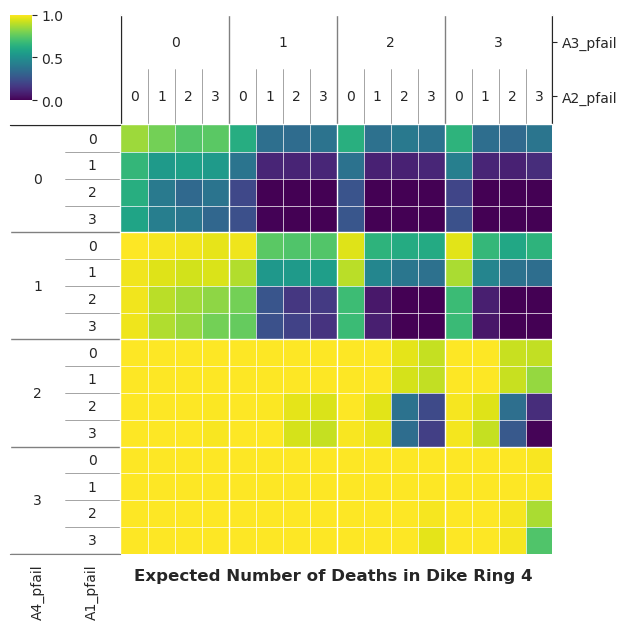

In [12]:
x = experiments
y = outcomes["A4_Expected_Number_of_Deaths"] < 0.0017

dimensional_stacking.create_pivot_plot(x, y, 2, nbins=4) 
fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.title('Expected Number of Deaths in Dike Ring 4',
          x=15, y=-5.7, fontweight='bold')
plt.savefig('./img/Dimensional_Stacking_Number_of_Deaths_DR4.png')
plt.show()

### 2.1.2 Expected Annual Damage in Dike Ring 4

In [13]:
# Determine the threshold value for keeping 68% of the total values
# Calculate the number of values greater than ..
greater_than_Annual_Damage_DR4 = len(outcomes[outcomes["A4_Expected_Annual_Damage"] < 3.55e6])

# Calculate the percentage
percentage_Annual_Damage_DR4 = ((greater_than_Annual_Damage_DR4
                                 / len(outcomes["A4_Expected_Annual_Damage"])
                                ) * 100)

# Print the result
print(f"The percentage is: {percentage_Annual_Damage_DR4:.2f}%")

The percentage is: 68.00%


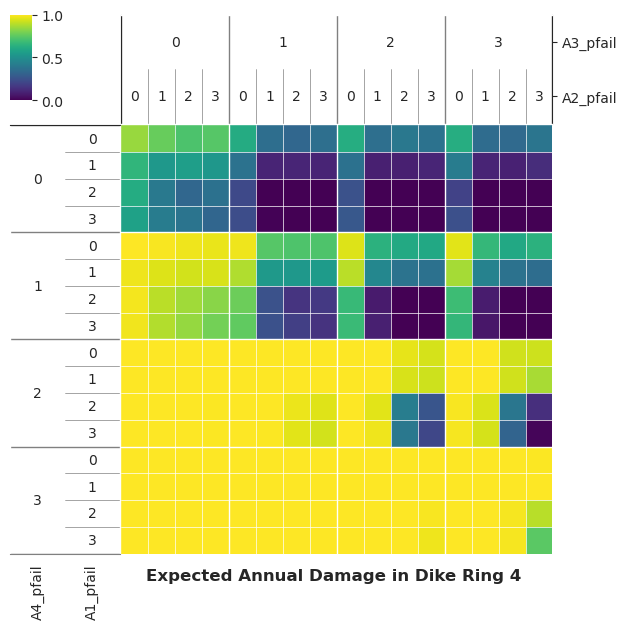

In [14]:
x = experiments
y = outcomes["A4_Expected_Annual_Damage"] < 3550000
dimensional_stacking.create_pivot_plot(x, y, 2,nbins=4) 

fig = plt.gcf()
fig.set_size_inches(7, 7)

# Make the plot pretty
plt.title('Expected Annual Damage in Dike Ring 4',
          x=15, y=-5.7, fontweight='bold')
plt.savefig('./img/Dimensional_Stacking_Annual_Damage_DR4.png')
plt.show()

### 2.2. Total Number of Deaths

In [15]:
# Determine the threshold value for keeping 68% of the total values

# Calculate the number of values greater than ..
greater_than_Total_Deaths = len(outcomes[outcomes["Total_Expected_Number_of_Deaths"] < 1.995])

# Calculate the percentage
percentage_Total_Deaths = ((greater_than_Total_Deaths
                            / len(outcomes["Total_Expected_Number_of_Deaths"])
                           ) * 100)

# Print the result
print(f"The percentage is: {percentage_Total_Deaths:.2f}%")

The percentage is: 68.00%


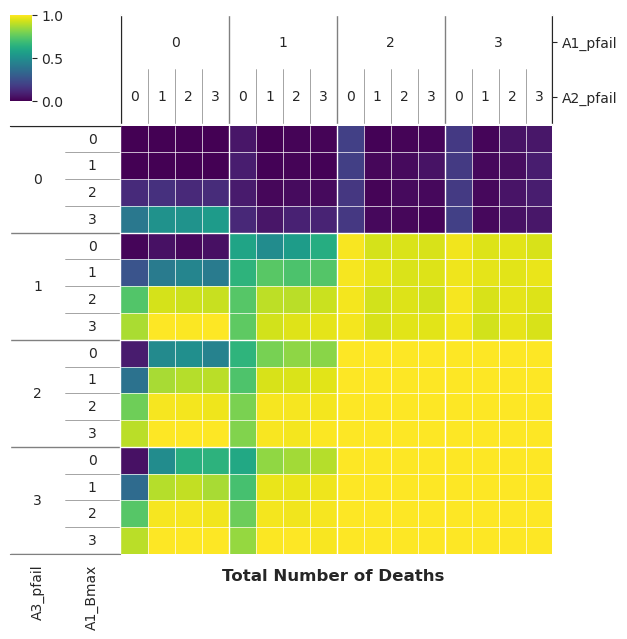

In [18]:
x = experiments
y = outcomes["Total_Expected_Number_of_Deaths"] < 1.995

dimensional_stacking.create_pivot_plot(x, y,2, nbins=4) 

fig = plt.gcf()
fig.set_size_inches(7, 7)

# Make the plot pretty
plt.title('Total Number of Deaths',
          x=15, y=-5.7, fontweight='bold')
plt.savefig('./img/Dimensional_Stacking_Total_Deaths.png')
plt.show()

### 2.3. Total Expected Annual Damage

In [17]:
# Determine the threshold value for keeping 68% of the total values
# Calculate the number of values greater than ..
greater_than_Total_Damage = len(outcomes[outcomes["Total_Expected_Annual_Damage"] < 2.546e9])

# Calculate the percentage
percentage_Total_Damage = ((greater_than_Total_Damage
                            / len(outcomes["Total_Expected_Annual_Damage"])
                           )* 100)

# Print the result
print(f"The percentage is: {percentage_Total_Damage:.2f}%")

The percentage is: 68.00%


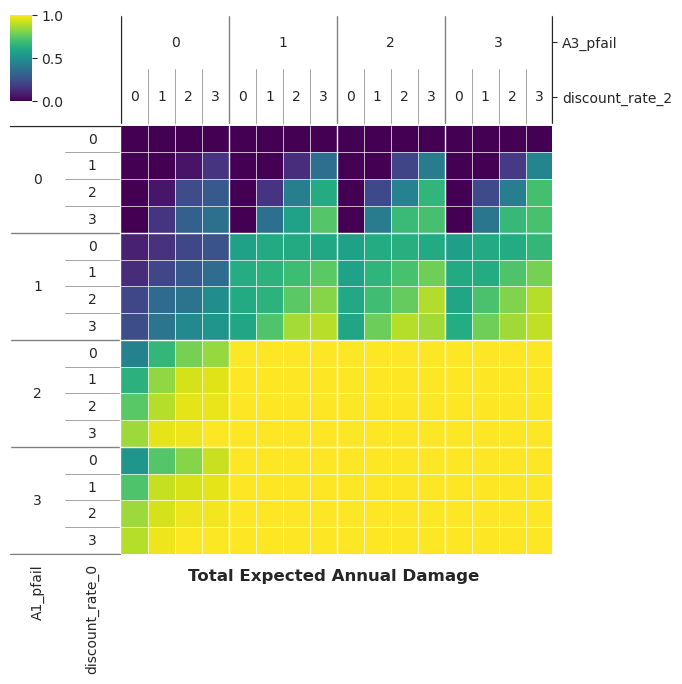

In [19]:
x = experiments
y = outcomes["Total_Expected_Annual_Damage"] < 2.546*1000000000

dimensional_stacking.create_pivot_plot(x, y,2, nbins=4) 

fig = plt.gcf()
fig.set_size_inches(7, 7)

# Make the plot pretty
plt.title('Total Expected Annual Damage',
          x=15, y=-5.7, fontweight='bold')
plt.savefig('./img/Dimensional_Stacking_Total_Damage.png')
plt.show()